PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
import numpy as np
import pandas as pd

In [29]:
data = pd.read_csv("C:\\My Computer\\Documents\\Excler\\Assignment\\Neural Networks\\forestfires.csv")
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [31]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
ffdata = data.copy()

In [33]:
ffdata = ffdata.drop(columns = ['month', 'day'], axis = 1)

In [34]:
ffdata.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [35]:
ffdata.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [36]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ffdata['size_category'] = label_encoder.fit_transform(ffdata['size_category'])

In [37]:
ffdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [38]:
x = ffdata.iloc[:,0:28]
y = ffdata.iloc[:, 28]

In [39]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [41]:
# create model
model = Sequential()
model.add(layers.Dense(42, input_dim=28, activation='relu'))  
model.add(layers.Dense(28, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
#compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [43]:
#fit the model
history = model.fit(x,y, validation_split = 0.33, epochs = 200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 9ms/step - loss: 0.7537 - accuracy: 0.7514 - val_loss: 2.3417 - val_accuracy: 0.6784
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.8035 - val_loss: 0.6419 - val_accuracy: 0.7427
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7775 - val_loss: 1.1144 - val_accuracy: 0.7661
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8642 - val_loss: 0.4779 - val_accuracy: 0.7836
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9046 - val_loss: 0.3598 - val_accuracy: 0.8655
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9104 - val_loss: 0.3742 - val_accuracy: 0.8596
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.9046 - val_loss: 0.3715 - val_accuracy: 0.8187
Epoch 8/200
3

Epoch 59/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9942 - val_loss: 0.2494 - val_accuracy: 0.9181
Epoch 60/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9798 - val_loss: 0.2350 - val_accuracy: 0.9240
Epoch 61/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9740 - val_loss: 1.0293 - val_accuracy: 0.8538
Epoch 62/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9855 - val_loss: 0.4830 - val_accuracy: 0.8947
Epoch 63/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9769 - val_loss: 0.2228 - val_accuracy: 0.9181
Epoch 64/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9971 - val_loss: 0.4165 - val_accuracy: 0.9181
Epoch 65/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9827 - val_loss: 0.1856 - val_accuracy: 0.9181
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9624 - val_loss: 0.4563 - val_accuracy: 0.9181
Epoch 117/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9798 - val_loss: 0.1064 - val_accuracy: 0.9591
Epoch 118/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9913 - val_loss: 0.5197 - val_accuracy: 0.9181
Epoch 119/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9769 - val_loss: 0.1268 - val_accuracy: 0.9474
Epoch 120/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.1873 - val_accuracy: 0.9474
Epoch 121/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9769 - val_loss: 0.1133 - val_accuracy: 0.9474
Epoch 122/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9827 - val_loss: 0.3357 - val_accuracy: 0.9298
Epoch 123/200

35/35 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9913 - val_loss: 0.1161 - val_accuracy: 0.9532
Epoch 174/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9798 - val_loss: 0.2135 - val_accuracy: 0.9532
Epoch 175/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9855 - val_loss: 0.1731 - val_accuracy: 0.9708
Epoch 176/200
35/35 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.9393 - val_loss: 0.4540 - val_accuracy: 0.9415
Epoch 177/200
35/35 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9682 - val_loss: 0.4167 - val_accuracy: 0.9415
Epoch 178/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9884 - val_loss: 0.2576 - val_accuracy: 0.9474
Epoch 179/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9942 - val_loss: 0.3629 - val_accuracy: 0.9357
Epoch 180/200

In [44]:
#evaluate the model 
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 935us/step - loss: 0.0824 - accuracy: 0.9807
accuracy: 98.07%


In [45]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

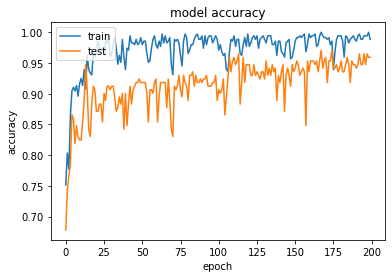

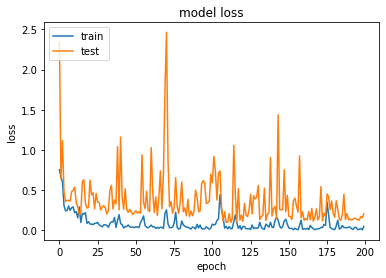

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [50]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [52]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


### Tuning of Hyperparameters - Batch Size and Epochs

In [16]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [53]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [54]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0) 
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [50,100,150]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 0) #by default kfold = 3
grid_result = grid.fit(X_standardized,y)

C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecat

C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecat

In [55]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9128453969955445, using {'batch_size': 10, 'epochs': 150}
0.897386109828949,0.04808111408950227 with: {'batch_size': 10, 'epochs': 50}
0.8915048480033875,0.05633787569371767 with: {'batch_size': 10, 'epochs': 100}
0.9128453969955445,0.04413331374983547 with: {'batch_size': 10, 'epochs': 150}
0.8974607944488525,0.06336648060223962 with: {'batch_size': 20, 'epochs': 50}
0.8993651986122131,0.05049364650192917 with: {'batch_size': 20, 'epochs': 100}
0.901306939125061,0.044139810151092765 with: {'batch_size': 20, 'epochs': 150}
0.8856796026229858,0.05936984824397194 with: {'batch_size': 40, 'epochs': 50}
0.8916355490684509,0.055970221229608326 with: {'batch_size': 40, 'epochs': 100}
0.8741224884986878,0.05904700030010691 with: {'batch_size': 40, 'epochs': 150}


### Tuning of Hyperparameters - Learning Rate and Drop Out Rate

In [56]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 150)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   5.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   5.2s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   5.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   5.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   5.0s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   5.4s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   5.2s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   5.0s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   5.0s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   5.1s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   5.0s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   5.1s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   5.1s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   5.1s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   5.2s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   5.3s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   5.3s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   5.3s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   5.3s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   5.2s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   5.2s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   5.3s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   5.3s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   5.5s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   5.4s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   5.3s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   5.2s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   5.2s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   5.3s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   5.2s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   5.2s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   5.3s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   5.5s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   5.3s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   5.2s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   5.3s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   5.3s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   5.2s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   5.2s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   5.2s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   5.5s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   5.3s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   5.3s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   5.2s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   5.2s


In [57]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9380134463310241, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9224981427192688,0.040225798136147746 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9051530957221985,0.054040481126999995 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7713218808174134,0.16390569775316113 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9380134463310241,0.0315970040516628 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9206310749053955,0.04462060164412092 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9263816356658936,0.03906815073027484 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9206870913505554,0.04319965781113455 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### Tuning of Hyperparameters - Activation Function and Kernel Initializer

In [58]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 150)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   5.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   6.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   5.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   5.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   5.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/12] END .activation_function=softmax, init=normal; total time=   5.5s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/12] END .activation_function=softmax, init=normal; total time=   5.5s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/12] END .activation_function=softmax, init=normal; total time=   5.5s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/12] END .activation_function=softmax, init=normal; total time=   5.5s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/12] END .activation_function=softmax, init=normal; total time=   5.5s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/12] END ...activation_function=softmax, init=zero; total time=   5.4s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=   5.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=   5.9s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time=   5.6s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/12] END ...activation_function=softmax, init=zero; total time=   5.5s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/12] END ...activation_function=relu, init=uniform; total time=   5.3s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/12] END ...activation_function=relu, init=uniform; total time=   5.2s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/12] END ...activation_function=relu, init=uniform; total time=   5.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/12] END ...activation_function=relu, init=uniform; total time=   5.2s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/12] END ...activation_function=relu, init=uniform; total time=   5.3s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/12] END ....activation_function=relu, init=normal; total time=   5.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time=   5.3s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time=   5.2s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/12] END ....activation_function=relu, init=normal; total time=   5.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/12] END ....activation_function=relu, init=normal; total time=   5.3s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/12] END ......activation_function=relu, init=zero; total time=   5.3s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/12] END ......activation_function=relu, init=zero; total time=   5.2s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/12] END ......activation_function=relu, init=zero; total time=   5.3s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/12] END ......activation_function=relu, init=zero; total time=   5.3s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/12] END ......activation_function=relu, init=zero; total time=   5.5s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   5.2s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   5.2s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   5.2s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   5.3s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   5.2s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/12] END ....activation_function=tanh, init=normal; total time=   5.3s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/12] END ....activation_function=tanh, init=normal; total time=   5.3s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/12] END ....activation_function=tanh, init=normal; total time=   5.3s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/12] END ....activation_function=tanh, init=normal; total time=   5.5s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/12] END ....activation_function=tanh, init=normal; total time=   5.3s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time=   5.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/12] END ......activation_function=tanh, init=zero; total time=   5.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/12] END ......activation_function=tanh, init=zero; total time=   5.4s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/12] END ......activation_function=tanh, init=zero; total time=   5.2s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/12] END ......activation_function=tanh, init=zero; total time=   5.3s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 10/12] END activation_function=linear, init=uniform; total time=   5.3s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 10/12] END activation_function=linear, init=uniform; total time=   5.4s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 10/12] END activation_function=linear, init=uniform; total time=   5.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 10/12] END activation_function=linear, init=uniform; total time=   5.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=   5.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   5.2s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   5.3s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   5.5s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   5.3s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   5.2s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   5.4s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 12/12] END ...activation_function=linear, init=zero; total time=   5.2s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 12/12] END ...activation_function=linear, init=zero; total time=   5.3s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 12/12] END ...activation_function=linear, init=zero; total time=   5.2s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 12/12] END ...activation_function=linear, init=zero; total time=   5.2s


In [59]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9535100936889649, using {'activation_function': 'linear', 'init': 'uniform'}
0.8779873013496399,0.06436869992674275 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8624906659126281,0.05473354893896633 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8528566122055053,0.06768274032218248 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9341859579086303,0.035252341345902986 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9418596029281616,0.03070254008522 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9496452450752259,0.02696210604633905 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9476848363876342,0.027161376719325194 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9535100936889649,0.028360213244869974 with: {'activa

### Tuning of Hyperparameter - Number of Neurons in activation layer

In [60]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 150)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   5.5s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   5.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   5.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   5.5s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   5.2s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   5.3s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   5.2s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   5.2s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   5.2s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   5.3s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   5.3s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   5.2s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   5.4s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   5.3s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   5.3s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   5.2s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   5.2s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   5.6s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   5.5s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   5.5s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   5.7s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   5.4s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   5.3s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   5.2s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   5.1s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   5.2s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   5.3s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   5.2s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   5.2s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   5.2s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   5.7s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   5.5s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   5.5s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   5.4s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   5.5s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   5.5s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   5.4s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   5.5s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   5.5s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   5.7s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   5.4s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 2/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   5.5s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 3/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   5.4s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 4/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   5.7s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\yasha\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


[CV 5/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   5.5s


In [61]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9573935866355896, using {'neuron1': 8, 'neuron2': 2}
0.9554518342018128,0.025701995489028635 with: {'neuron1': 4, 'neuron2': 2}
0.9534914016723632,0.02560701856414229 with: {'neuron1': 4, 'neuron2': 4}
0.9496265888214112,0.027014153697387244 with: {'neuron1': 4, 'neuron2': 8}
0.9573935866355896,0.02569353105624353 with: {'neuron1': 8, 'neuron2': 2}
0.9496265888214112,0.02837555031791039 with: {'neuron1': 8, 'neuron2': 4}
0.9496452450752259,0.02696210604633905 with: {'neuron1': 8, 'neuron2': 8}
0.951568329334259,0.02601046424295723 with: {'neuron1': 16, 'neuron2': 2}
0.9496265888214112,0.027014153697387244 with: {'neuron1': 16, 'neuron2': 4}
0.9476848363876342,0.031047759641568046 with: {'neuron1': 16, 'neuron2': 8}


### Training model with optimum values of Hyperparameters

In [62]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 150)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

0.9864603481624759
